In [16]:
import numpy as np
import os

np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [17]:
import pandas as pd

def load_earthquake_data(path='../data/'):
    csv_path = os.path.join(path, 'database.csv')
    return pd.read_csv(csv_path)

In [18]:
earthquakes = load_earthquake_data()
earthquakes.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type    ...      \
0                     NaN        6.0             MW    ...       
1                     NaN        5.8             MW    ...       
2                     NaN        6.2             MW    ...       
3                     NaN        5.8             MW    ...       
4                     NaN        5.8             MW    ...       

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic  

[5 rows x 21 columns]

In [19]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
Date                          23412 non-null object
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Sou

In [20]:
earthquakes['Source'].value_counts()

US           20630
ISCGEM        2460
ISCGEMSUP      120
CI              61
GCMT            55
NC              51
AK              12
OFFICIAL         8
UW               6
NN               4
ATLAS            3
SE               1
PR               1
Name: Source, dtype: int64

In [21]:
earthquakes.describe()

Latitude     Longitude         Depth  Depth Error  \
count  23412.000000  23412.000000  23412.000000  4461.000000   
mean       1.679033     39.639961     70.767911     4.993115   
std       30.113183    125.511959    122.651898     4.875184   
min      -77.080000   -179.997000     -1.100000     0.000000   
25%      -18.653000    -76.349750     14.522500     1.800000   
50%       -3.568500    103.982000     33.000000     3.500000   
75%       26.190750    145.026250     54.000000     6.300000   
max       86.005000    179.998000    700.000000    91.295000   

       Depth Seismic Stations     Magnitude  Magnitude Error  \
count             7097.000000  23412.000000       327.000000   
mean               275.364098      5.882531         0.071820   
std                162.141631      0.423066         0.051466   
min                  0.000000      5.500000         0.000000   
25%                146.000000      5.600000         0.046000   
50%                255.000000      5.700000         0.059000   
75%                384.000000      6.000000         0.075500   
max                934.000000      9.100000         0.410000   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
count                 2564.000000    7299.000000          1604.000000   
mean                    48.944618      44.163532             3.992660   
std                     62.943106      32.141486             5.377262   
min                      0.000000       0.000000             0.004505   
25%                     10.000000      24.100000             0.968750   
50%                     28.000000      36.000000             2.319500   
75%                     66.000000      54.000000             4.724500   
max                    821.000000     360.000000            37.874000   

       Horizontal Error  Root Mean Square  
count       1156.000000      17352.000000  
mean           7.662759          1.022784  
std           10.430396          0.188545  
min            0.085000          0.000000  
25%            5.300000          0.900000  
50%            6.700000          1.000000  
75%            8.100000          1.130000  
max           99.000000          3.440000

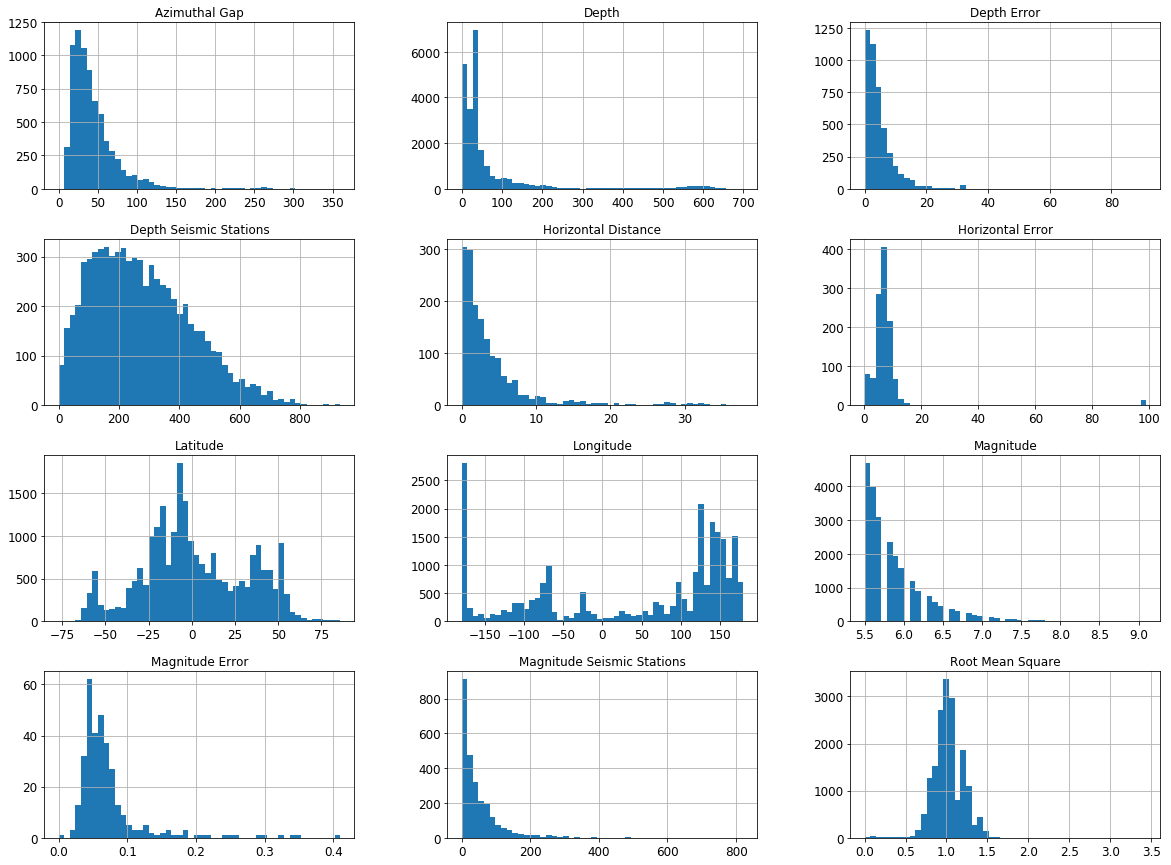

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
earthquakes.hist(bins=50, figsize=(20,15))
plt.show()

The graphs above are the histograms of the features in the dataset. In the magnitude histogram there seems to be more earthqukes with a smaller magnitude than those with a larger magnitude.

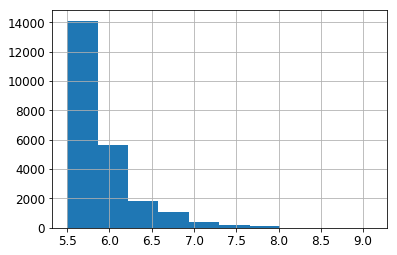

In [23]:
earthquakes['Magnitude'].hist()

Selecting the main features we are going to pass through into the model

In [24]:
earthquakes = earthquakes[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
earthquakes.head()

Date      Time  Latitude  Longitude  Depth  Magnitude
0  01/02/1965  13:44:18    19.246    145.616  131.6        6.0
1  01/04/1965  11:29:49     1.863    127.352   80.0        5.8
2  01/05/1965  18:05:58   -20.579   -173.972   20.0        6.2
3  01/08/1965  18:49:43   -59.076    -23.557   15.0        5.8
4  01/09/1965  13:32:50    11.938    126.427   15.0        5.8

Scale the time features

In [69]:
import datetime
import time

timestamp = []
for d, t in zip(earthquakes['Date'], earthquakes['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except:
        # print('ValueError')
        timestamp.append('ValueError')

In [70]:
timeStamp = pd.Series(timestamp)
earthquakes['Timestamp'] = timeStamp.values

In [71]:
final_data = earthquakes.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

Latitude  Longitude  Depth  Magnitude Timestamp
1455    28.532    129.075   25.0        6.3     10916
1456   -29.400   -177.169   35.0        5.6     90660
1457    24.185    102.543   11.3        7.1    349241
1458    23.984    102.732   15.0        5.9    416950
1459    -9.583    151.493   15.0        6.3    480954

In [72]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'